Auteur : Jimmy Lauzer

Tâche 7

Ce notebook permet de télécharger le fichier CIF du matériau qui m'a été attribué et de déterminer les trois premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Ka d'une longueur d'onde égale à 1.54060 angströms.

Voici le graphe du diffractogramme correspondant pour un rayonnement X incident Cu Kα, fourni par l objet XRDCalculator


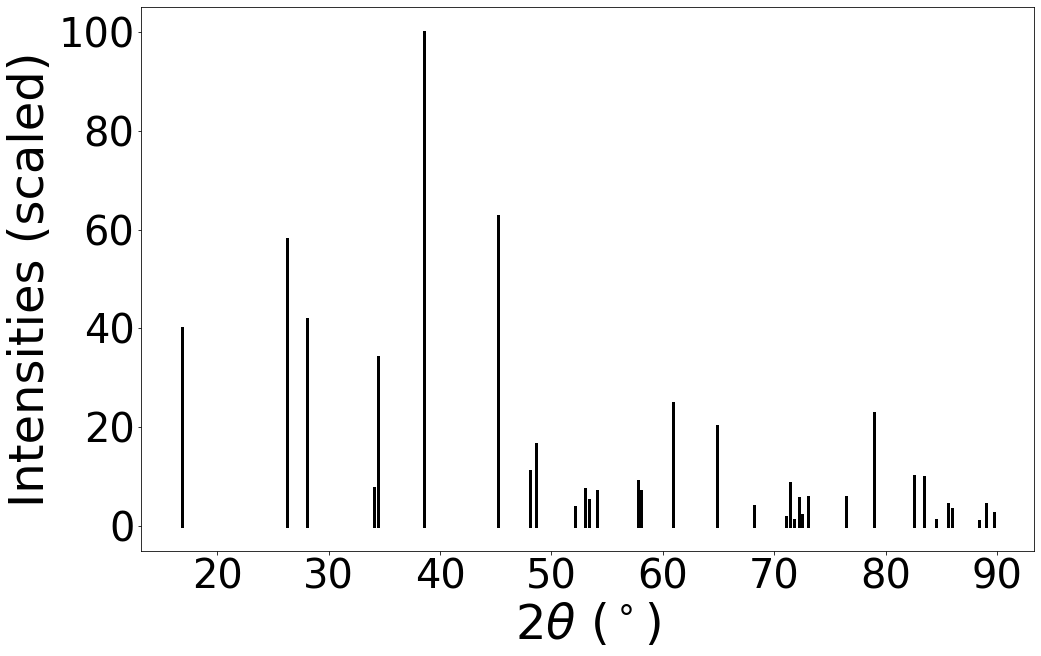



Voici maintenant le graphe du diffractogramme présent sur Materials Project


In [12]:
from pymatgen.io.cif import CifWriter #différents import nécessaires
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy
from matplotlib import pyplot
with MPRester("ZsX7S4MaIQIVbxyXjs") as m :
    struct = m.get_structure_by_material_id("mp-567456") #récuperation de la structure
    newCifFile = CifWriter(struct) #création du fichier cif et écriture dans le fichier
    newCifFile.write_file('structure_mp567456.cif')

#Création de l'objet calculator du modèle de diffraction
calculator = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)

#Récupération du pattern du modèle 
calc = calculator.get_pattern(struct, scaled=True, two_theta_range=(0, 90))

#Graphe du diffractogramme par l'objet XRDCalculator
print('Voici le graphe du diffractogramme correspondant pour un rayonnement X incident Cu K\u03B1, fourni par l objet XRDCalculator')
calculator.show_plot(struct, annotate_peaks = False)
print('\n')

#Graphe du diffractogramme sur Materials Project
print('Voici maintenant le graphe du diffractogramme présent sur Materials Project')



<p><img src=diffraction.PNG></p>

Voici un graphe reprenant les trois premiers pics indiqués sur Materials Project


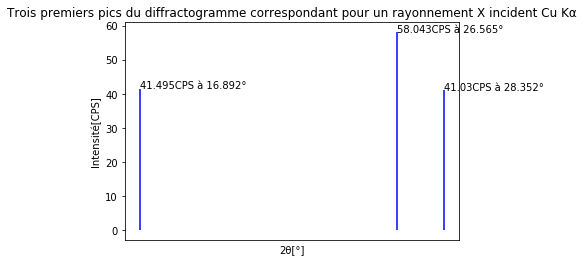

Voici maintenant une analyse des informations sur ces pics fournies par l objet XRDCalculator


Pic 1
2θ = 16.845179638956907 °
Intensité = 40.05831512179074 CPS
Indices (hkl) = [{'hkl': (0, 0, 1), 'multiplicity': 2}]


Pic 2
2θ = 26.26811422322254 °
Intensité = 58.07895100617641 CPS
Indices (hkl) = [{'hkl': (1, 0, 0), 'multiplicity': 4}, {'hkl': (1, 1, 1), 'multiplicity': 2}]


Pic 3
2θ = 28.06310863795079 °
Intensité = 41.85661164166559 CPS
Indices (hkl) = [{'hkl': (1, 1, 0), 'multiplicity': 6}]




In [13]:
#Création du graphe reprenant les trois premiers pic indiqués sur Materials Project 
abscisses = [16.892, 26.565, 28.352]
ordonnees = [41.495, 58.043, 41.03]
start = [0,0,0]
pyplot.title("Trois premiers pics du diffractogramme correspondant pour un rayonnement X incident Cu K\u03B1")
pyplot.xlabel('2\u03B8[°]')
pyplot.ylabel('Intensité[CPS]')
pyplot.xticks(numpy.arange(5,16,1))
pyplot.yticks(numpy.arange(0,101,10))

pyplot.vlines(abscisses, start, ordonnees, color = 'blue')
pyplot.text(abscisses[0], ordonnees[0], '41.495CPS à 16.892°')
pyplot.text(abscisses[1], ordonnees[1], '58.043CPS à 26.565°')
pyplot.text(abscisses[2], ordonnees[2], '41.03CPS à 28.352°')
print('Voici un graphe reprenant les trois premiers pics indiqués sur Materials Project')
pyplot.show()

#Informations complètes sur ces pics fournies par l'objet XRDCalculator
print('Voici maintenant une analyse des informations sur ces pics fournies par l objet XRDCalculator')
print('\n')
print('Pic 1')
print('2\u03B8 =', (calc.x)[0], '°')
print('Intensité =', (calc.y[0]), 'CPS')
print('Indices (hkl) =', calc.hkls[0])
print('\n')

print('Pic 2')
print('2\u03B8 =', (calc.x)[1], '°')
print('Intensité =', (calc.y[1]), 'CPS')
print('Indices (hkl) =', calc.hkls[1])
print('\n')

print('Pic 3')
print('2\u03B8 =', (calc.x)[2], '°')
print('Intensité =', (calc.y[2]), 'CPS')
print('Indices (hkl) =', calc.hkls[2])
print('\n')